## Congratulations you have been hired by a cancer research center to assist in determining if a specific data set containing cancer cells can be classified as benign or melignant. Because this is such a crucial classification the cancer canter is looking for a classificaiton accuracy of approximaty 90-100%. As you can guess, low accuracy in classifying these cancer cell can be a huge factor. 

## You will use your neural network experience to achieve this task.

In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing data

In [262]:
from sklearn.datasets import load_breast_cancer

In [263]:
cancer_data = pd.DataFrame(load_breast_cancer()["data"])

In [264]:
cancer_data["target"] = load_breast_cancer()["target"]

## Data observation
- There are 569 data entries on each cancer characteristics. 
- appears we are not missing any data so that is good news
- We do on the other hand have a large feature list of 29, whuch could be helpful in classificaiton

In [265]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
0         569 non-null float64
1         569 non-null float64
2         569 non-null float64
3         569 non-null float64
4         569 non-null float64
5         569 non-null float64
6         569 non-null float64
7         569 non-null float64
8         569 non-null float64
9         569 non-null float64
10        569 non-null float64
11        569 non-null float64
12        569 non-null float64
13        569 non-null float64
14        569 non-null float64
15        569 non-null float64
16        569 non-null float64
17        569 non-null float64
18        569 non-null float64
19        569 non-null float64
20        569 non-null float64
21        569 non-null float64
22        569 non-null float64
23        569 non-null float64
24        569 non-null float64
25        569 non-null float64
26        569 non-null float64
27        569 non-null float64
28        569 non-null floa

In [266]:
cancer_data.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Training and Testing and Spliting our data
 - X is our feature list 
 - y is or target (binary) 

In [267]:
X = cancer_data.drop("target", axis = 1).values
y = cancer_data["target"].values

In [268]:
from sklearn.model_selection import train_test_split

### Sample 
- We will take 30% of the data randomly selected

In [269]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [270]:
X_train.shape

(398, 30)

In [271]:
y_train.shape

(398,)

In [272]:
X_test.shape

(171, 30)

In [273]:
y_test.shape

(171,)

## Scaling data 
- we will train our model on scaled data to take outliers into account 

In [274]:
from sklearn.preprocessing import MinMaxScaler

In [275]:
scalar = MinMaxScaler()

In [276]:
X_train = scalar.fit_transform(X_train)

In [277]:
X_test = scalar.transform(X_test)

### lets being setting up our model 
- our approach will be to gradually improve the model
- without a dropout/early stopping
- we will add these as improve the model

In [278]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Dense

In [279]:
model = Sequential()
model.add(Dense(units =30, activation = "relu"))
model.add(Dense(units =30, activation = "relu"))
model.add(Dense(units =15, activation = "relu"))
model.add(Dense(units =1, activation = "sigmoid"))
model.compile(optimizer = "adam", loss = "binary_crossentropy")

## Fitting the model
- We will fit the model to the data
- vaidation data will be our test data

In [280]:
model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=400)

Train on 398 samples, validate on 171 samples
Epoch 1/400
398/398 [==============================] - 1s 3ms/sample - loss: 0.6804 - val_loss: 0.6613
Epoch 2/400
398/398 [==============================] - 0s 273us/sample - loss: 0.6373 - val_loss: 0.6175
Epoch 3/400
398/398 [==============================] - 0s 276us/sample - loss: 0.5845 - val_loss: 0.5628
Epoch 4/400
398/398 [==============================] - 0s 270us/sample - loss: 0.5223 - val_loss: 0.4957
Epoch 5/400
398/398 [==============================] - 0s 274us/sample - loss: 0.4512 - val_loss: 0.4242
Epoch 6/400
398/398 [==============================] - 0s 279us/sample - loss: 0.3800 - val_loss: 0.3517
Epoch 7/400
398/398 [==============================] - 0s 278us/sample - loss: 0.3159 - val_loss: 0.2961
Epoch 8/400
398/398 [==============================] - 0s 278us/sample - loss: 0.2644 - val_loss: 0.2518
Epoch 9/400
398/398 [==============================] - 0s 276us/sample - loss: 0.2264 - val_loss: 0.2217
Epoch 10/40

Epoch 78/400
398/398 [==============================] - 0s 302us/sample - loss: 0.0300 - val_loss: 0.1179
Epoch 79/400
398/398 [==============================] - 0s 292us/sample - loss: 0.0339 - val_loss: 0.1159
Epoch 80/400
398/398 [==============================] - 0s 271us/sample - loss: 0.0305 - val_loss: 0.1187
Epoch 81/400
398/398 [==============================] - 0s 267us/sample - loss: 0.0267 - val_loss: 0.1138
Epoch 82/400
398/398 [==============================] - 0s 268us/sample - loss: 0.0279 - val_loss: 0.1188
Epoch 83/400
398/398 [==============================] - 0s 278us/sample - loss: 0.0279 - val_loss: 0.1224
Epoch 84/400
398/398 [==============================] - 0s 271us/sample - loss: 0.0282 - val_loss: 0.1131
Epoch 85/400
398/398 [==============================] - 0s 274us/sample - loss: 0.0294 - val_loss: 0.1127
Epoch 86/400
398/398 [==============================] - 0s 286us/sample - loss: 0.0326 - val_loss: 0.1282
Epoch 87/400
398/398 [========================

Epoch 155/400
398/398 [==============================] - 0s 277us/sample - loss: 0.0132 - val_loss: 0.1446
Epoch 156/400
398/398 [==============================] - 0s 275us/sample - loss: 0.0134 - val_loss: 0.1486
Epoch 157/400
398/398 [==============================] - 0s 266us/sample - loss: 0.0130 - val_loss: 0.1490
Epoch 158/400
398/398 [==============================] - 0s 264us/sample - loss: 0.0129 - val_loss: 0.1445
Epoch 159/400
398/398 [==============================] - 0s 269us/sample - loss: 0.0139 - val_loss: 0.1637
Epoch 160/400
398/398 [==============================] - 0s 311us/sample - loss: 0.0145 - val_loss: 0.1589
Epoch 161/400
398/398 [==============================] - 0s 306us/sample - loss: 0.0113 - val_loss: 0.1596
Epoch 162/400
398/398 [==============================] - 0s 299us/sample - loss: 0.0168 - val_loss: 0.1590
Epoch 163/400
398/398 [==============================] - 0s 267us/sample - loss: 0.0121 - val_loss: 0.1573
Epoch 164/400
398/398 [==============

398/398 [==============================] - 0s 277us/sample - loss: 0.0038 - val_loss: 0.2440
Epoch 232/400
398/398 [==============================] - 0s 285us/sample - loss: 0.0040 - val_loss: 0.2453
Epoch 233/400
398/398 [==============================] - 0s 288us/sample - loss: 0.0044 - val_loss: 0.2445
Epoch 234/400
398/398 [==============================] - 0s 280us/sample - loss: 0.0053 - val_loss: 0.2418
Epoch 235/400
398/398 [==============================] - 0s 281us/sample - loss: 0.0058 - val_loss: 0.2498
Epoch 236/400
398/398 [==============================] - 0s 264us/sample - loss: 0.0042 - val_loss: 0.2555
Epoch 237/400
398/398 [==============================] - 0s 265us/sample - loss: 0.0038 - val_loss: 0.2520
Epoch 238/400
398/398 [==============================] - 0s 264us/sample - loss: 0.0033 - val_loss: 0.2499
Epoch 239/400
398/398 [==============================] - 0s 264us/sample - loss: 0.0032 - val_loss: 0.2525
Epoch 240/400
398/398 [============================

398/398 [==============================] - 0s 307us/sample - loss: 0.0013 - val_loss: 0.3380
Epoch 308/400
398/398 [==============================] - 0s 308us/sample - loss: 0.0015 - val_loss: 0.3400
Epoch 309/400
398/398 [==============================] - 0s 301us/sample - loss: 0.0015 - val_loss: 0.3429
Epoch 310/400
398/398 [==============================] - 0s 274us/sample - loss: 0.0015 - val_loss: 0.3447
Epoch 311/400
398/398 [==============================] - 0s 284us/sample - loss: 0.0012 - val_loss: 0.3430
Epoch 312/400
398/398 [==============================] - 0s 272us/sample - loss: 0.0014 - val_loss: 0.3497
Epoch 313/400
398/398 [==============================] - 0s 281us/sample - loss: 0.0017 - val_loss: 0.3524
Epoch 314/400
398/398 [==============================] - 0s 279us/sample - loss: 0.0014 - val_loss: 0.3499
Epoch 315/400
398/398 [==============================] - 0s 288us/sample - loss: 0.0012 - val_loss: 0.3490
Epoch 316/400
398/398 [============================

398/398 [==============================] - 0s 279us/sample - loss: 5.1394e-04 - val_loss: 0.4159
Epoch 383/400
398/398 [==============================] - 0s 286us/sample - loss: 5.4629e-04 - val_loss: 0.4134
Epoch 384/400
398/398 [==============================] - 0s 294us/sample - loss: 5.3117e-04 - val_loss: 0.4161
Epoch 385/400
398/398 [==============================] - 0s 275us/sample - loss: 5.1137e-04 - val_loss: 0.4163
Epoch 386/400
398/398 [==============================] - 0s 288us/sample - loss: 5.5812e-04 - val_loss: 0.4200
Epoch 387/400
398/398 [==============================] - 0s 278us/sample - loss: 5.3989e-04 - val_loss: 0.4217
Epoch 388/400
398/398 [==============================] - 0s 285us/sample - loss: 4.9239e-04 - val_loss: 0.4177
Epoch 389/400
398/398 [==============================] - 0s 283us/sample - loss: 6.0740e-04 - val_loss: 0.4309
Epoch 390/400
398/398 [==============================] - 0s 284us/sample - loss: 7.0030e-04 - val_loss: 0.4205
Epoch 391/400
3

### Model Performance
- we will take a look at how well the model did and how it improved on the error during training
- model performed pretty well, bust shows that we can still improve on training 
- we will add in early stopping with a larger epoch to prevent over training

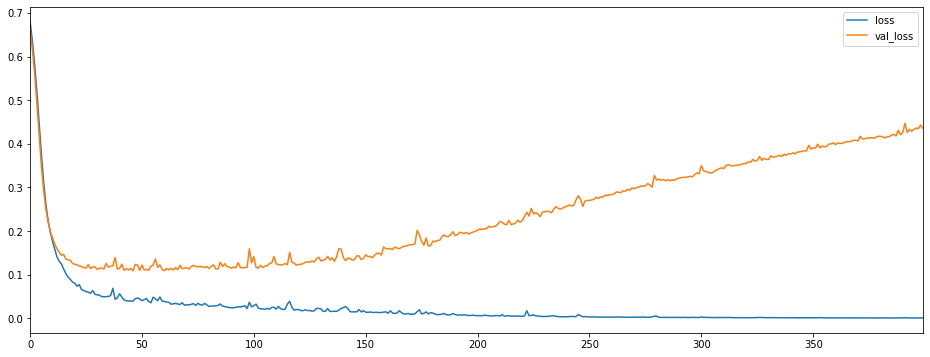

In [281]:
pd.DataFrame(model.history.history).plot(figsize = (16,6))

## Model_predictions

In [282]:
predictions = model.predict_classes(X_test)

### Metrics
- though our model is overfitting it still has a predictive capabiity of 95%
- we will test if this is improved by early stopping below

In [283]:
from sklearn.metrics import classification_report, confusion_matrix

In [284]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93        66
           1       0.96      0.94      0.95       105

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



### Model with Early Stopping
- early stopping will observe the val loss accompanied with the "min" mode to make sure this stay low
- if the val_loss begins to increase the patienct call will wait that many epochs before stopping

In [285]:
from tensorflow.keras.callbacks import EarlyStopping

In [286]:
stop = EarlyStopping(monitor="val_loss", mode="min", patience=40)

In [287]:
model = Sequential()
model.add(Dense(units =30, activation = "relu"))
model.add(Dense(units =30, activation = "relu"))
model.add(Dense(units =15, activation = "relu"))
model.add(Dense(units =1, activation = "sigmoid"))
model.compile(optimizer = "adam", loss = "binary_crossentropy")

In [288]:
model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=400, callbacks=[stop])

Train on 398 samples, validate on 171 samples
Epoch 1/400
398/398 [==============================] - 2s 6ms/sample - loss: 0.6882 - val_loss: 0.6755
Epoch 2/400
398/398 [==============================] - 0s 283us/sample - loss: 0.6613 - val_loss: 0.6445
Epoch 3/400
398/398 [==============================] - 0s 301us/sample - loss: 0.6176 - val_loss: 0.5942
Epoch 4/400
398/398 [==============================] - 0s 304us/sample - loss: 0.5561 - val_loss: 0.5257
Epoch 5/400
398/398 [==============================] - 0s 292us/sample - loss: 0.4783 - val_loss: 0.4440
Epoch 6/400
398/398 [==============================] - 0s 283us/sample - loss: 0.3976 - val_loss: 0.3678
Epoch 7/400
398/398 [==============================] - 0s 284us/sample - loss: 0.3262 - val_loss: 0.3063
Epoch 8/400
398/398 [==============================] - 0s 284us/sample - loss: 0.2717 - val_loss: 0.2609
Epoch 9/400
398/398 [==============================] - 0s 286us/sample - loss: 0.2308 - val_loss: 0.2293
Epoch 10/40

Epoch 78/400
398/398 [==============================] - 0s 276us/sample - loss: 0.0359 - val_loss: 0.1346
Epoch 79/400
398/398 [==============================] - 0s 278us/sample - loss: 0.0314 - val_loss: 0.1368
Epoch 80/400
398/398 [==============================] - 0s 297us/sample - loss: 0.0312 - val_loss: 0.1351


### Model Performance w/ stopping
- Our model has improved perfoemance and is also no longer overtraining
- We can certaily improve the accuracy of the model by adding a dropout later
- We will do so below

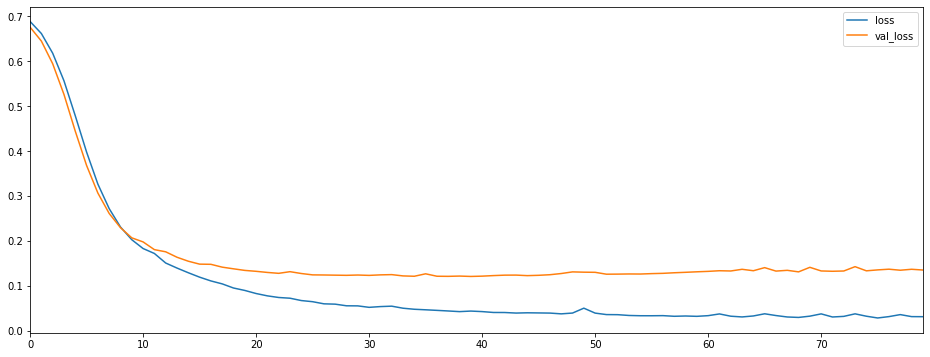

In [289]:
pd.DataFrame(model.history.history).plot(figsize = (16,6))

## Model-Predicitons w/ early stopping
- improvement of 2 % accuracy 
- So early stopping did help improve predictions

In [290]:
predictions = model.predict_classes(X_test)

In [291]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        66
           1       0.97      0.98      0.98       105

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



## Model Creation - Dropout added
- Dropout should improve the model prediction by removing a certain percentage of the data in the layers each epoch

In [292]:
model = Sequential()
model.add(Dense(units =30, activation = "relu"))
model.add(Dropout(.5))
model.add(Dense(units =30, activation = "relu"))
model.add(Dropout(.5))
model.add(Dense(units =15, activation = "relu"))
model.add(Dropout(.5))
model.add(Dense(units =1, activation = "sigmoid"))
model.compile(optimizer = "adam", loss = "binary_crossentropy")

In [293]:
model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=400, callbacks=[stop])

Train on 398 samples, validate on 171 samples
Epoch 1/400
398/398 [==============================] - 2s 4ms/sample - loss: 0.7059 - val_loss: 0.6888
Epoch 2/400
398/398 [==============================] - 0s 332us/sample - loss: 0.6923 - val_loss: 0.6873
Epoch 3/400
398/398 [==============================] - 0s 319us/sample - loss: 0.6845 - val_loss: 0.6846
Epoch 4/400
398/398 [==============================] - 0s 329us/sample - loss: 0.6801 - val_loss: 0.6822
Epoch 5/400
398/398 [==============================] - 0s 322us/sample - loss: 0.6837 - val_loss: 0.6804
Epoch 6/400
398/398 [==============================] - 0s 325us/sample - loss: 0.6620 - val_loss: 0.6766
Epoch 7/400
398/398 [==============================] - 0s 328us/sample - loss: 0.6647 - val_loss: 0.6642
Epoch 8/400
398/398 [==============================] - 0s 329us/sample - loss: 0.6538 - val_loss: 0.6504
Epoch 9/400
398/398 [==============================] - 0s 346us/sample - loss: 0.6561 - val_loss: 0.6405
Epoch 10/40

Epoch 78/400
398/398 [==============================] - 0s 324us/sample - loss: 0.0946 - val_loss: 0.1189
Epoch 79/400
398/398 [==============================] - 0s 316us/sample - loss: 0.1082 - val_loss: 0.1095
Epoch 80/400
398/398 [==============================] - 0s 321us/sample - loss: 0.1027 - val_loss: 0.1056
Epoch 81/400
398/398 [==============================] - 0s 316us/sample - loss: 0.1028 - val_loss: 0.1199
Epoch 82/400
398/398 [==============================] - 0s 315us/sample - loss: 0.0808 - val_loss: 0.1125
Epoch 83/400
398/398 [==============================] - 0s 317us/sample - loss: 0.1254 - val_loss: 0.1068
Epoch 84/400
398/398 [==============================] - 0s 315us/sample - loss: 0.0844 - val_loss: 0.1133
Epoch 85/400
398/398 [==============================] - 0s 316us/sample - loss: 0.1012 - val_loss: 0.1074
Epoch 86/400
398/398 [==============================] - 0s 314us/sample - loss: 0.1186 - val_loss: 0.1076
Epoch 87/400
398/398 [========================

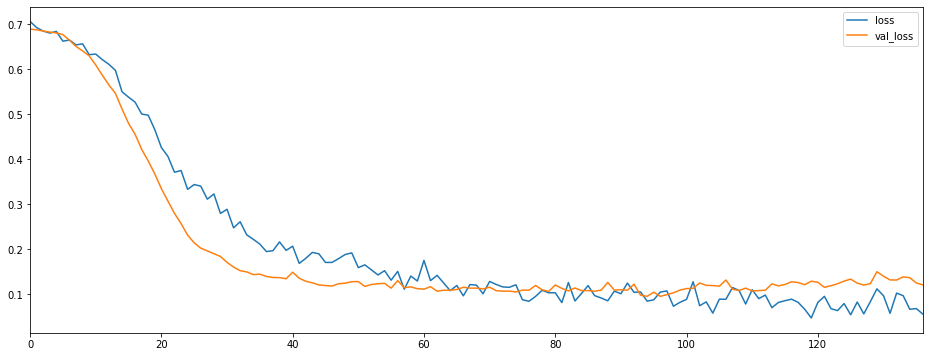

In [294]:
pd.DataFrame(model.history.history).plot(figsize = (16,6))

### Model Predictions -w/Dropout
- model is set to have a 97% prediciton accuracy 
- even after adding the drop out
- We do see a invrease in recall 

In [295]:
predicitons = model.predict_classes(X_test)

In [296]:
print(classification_report(y_test, predicitons))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        66
           1       0.97      0.98      0.98       105

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



## testing Model 
- Best way to test our model is to bring in random data and see its predictive power
- We will take a random row of the original and pass it into the model removing the target 
- This will allow the model to tell us the cancer classificaiton 

In [310]:
from random import randint
random_index = randint(1, len(cancer_data))
new_cell = cancer_data.drop("target", axis = 1).iloc[random_index]

### New Cell
- Will need to scale this cell as well as reshape it to pass it to the model

In [311]:
new_cell = scalar.transform(new_cell.values.reshape(-1,30))

### Model Prediction -> random data 

In [312]:
model.predict_classes(new_cell)

array([[0]], dtype=int32)

### PRedicton Test
- Lets see if our model was accurate in prediction
- Actual value of "target" from out original Cancer Data Set

In [313]:
cancer_data.iloc[random_index]["target"]

0.0